## Introduction: 

### For convenience, I have changed the column name of "scored.class" to "scored" and "scored.probability" to "scoredprobability" in excel by hand.

In [281]:
#import the file and important packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import statistics 

from sklearn import metrics

import pandas as pd
data = pd.read_excel("M5_Data.xls")

## Data preprocessing

#### To begin my data prepocessing, first I want to check what the types of data are in my dataset:

In [37]:
#check the types of data 
data.dtypes

pregnant               int64
glucose                int64
diastolic              int64
skinfold               int64
insulin                int64
bmi                  float64
pedigree             float64
age                    int64
class                  int64
scored                 int64
scoredprobability    float64
dtype: object

### I could see that all the features are numeric, 3 of them are floats and others are ints.

In [38]:
#Check the data shape
print(data.shape)
data.head(5)

(181, 11)


,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored,scoredprobability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


### The data has 181 rows and 11 columns at all.

### Use Pandas’ crosstab() function to calculate the contents of a confusion matrix for the data. 

In [50]:
import pandas as pd 
crosstab = pd.crosstab(data['class'],data['scored'])
crosstab

scored,0,1
class,,
0,119,5
1,30,27


### Do the rows represent the actual or the predicted classification?
### What about the columns? 
### A good way to ensure I understand the output of the crosstab() function is to check the value_counts() for the dataframe columns I’ve used as input to the crosstab() function. When observing the value_counts(), determine whether the rows or columns in the crosstab() output sum to the respective value_counts() figures.

In [52]:
class_count = data['class'].value_counts()
class_count

0    124
1     57
Name: class, dtype: int64

In [53]:
scored_count = data['scored'].value_counts()
scored_count

0    149
1     32
Name: scored, dtype: int64

### From value_counts() function, I can easily see there are 149 of 0 in scored.class column, while there are 124 of 0 in class, from row, we could see 119 + 30 = 149, which means the rows of cross table are scored.class, and the columns of cross table are class. Since class are actual classification while scored.class are predicted classification, that means the columns of cross table are actual classification while the rows are predicted classification.

### Therefore, we created the new confusion matrix adding the labels:

In [131]:
confusion_matrix = pd.crosstab(data['class'], data['scored'], rownames=['Predicted'], colnames=['Actual'])
confusion_matrix

Actual,0,1
Predicted,,
0,119,5
1,30,27


## Displaying the Confusion Matrix using seaborn

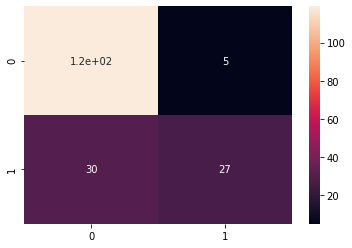

In [75]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()

### Extract the individual confusion matrix values (i.e., True Positive, False Positive, True Negative, FalseNegative) from the output of the crosstab() function and save them for later use:

In [177]:
#Change the dataframe to array then extract the TN, FP, FN and TP
confusion_matrix = confusion_matrix.values
values = confusion_matrix.ravel()
values

array([119,   5,  30,  27])

In [74]:
TrueNegative = values[0]
FalsePositive = values[1]
FalseNegative = values[2]
TruePositive = values[3]

### Write a Python function that accepts as input the actual and predicted classifications for any binary classification data 

In [116]:
def perf_measure(Actual, Predicted):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range (max(len(Actual),len(Predicted))): 
        if Actual[i]==Predicted[i]==1:
           TP += 1
        if Predicted[i]==1 and Actual[i]!=Predicted[i]:
           FP += 1
        if Actual[i]==Predicted[i]==0:
           TN += 1
        if Predicted[i]==0 and Actual[i]!=Predicted[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [136]:
values = perf_measure(Actual, Predicted)
values

(27, 5, 119, 30)

### Recall the accuracy is defined as the ratio of number of correct predictions to the total number of input samples: Accuracy = (True positives + True negatives) / (True positives + True negatives + False positives + False negatives):

### Then calculates and returns the accuracy metric for the predictions without utilizing any pre-built Python accuracy metric calculation functions.

In [132]:
def metric(Actual, Predicted):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range (max(len(Actual),len(Predicted))): 
        if Actual[i]==Predicted[i]==1:
           TP += 1
        if Predicted[i]==1 and Actual[i]!=Predicted[i]:
           FP += 1
        if Actual[i]==Predicted[i]==0:
           TN += 1
        if Predicted[i]==0 and Actual[i]!=Predicted[i]:
           FN += 1
        
        Accuracy = (TP + TN)/(TP + TN + FP + FN)

    return(Accuracy)

In [133]:
Accuracy = metric(data['class'], data['scored'])
Accuracy

0.8066298342541437

### Recall that Precision is the number of correct positive results divided by the number of positive results predicted by the classifier: Precision = True positives / (True positives + False positives):

### Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the precision metric for the predictions without utilizing any pre-built Python classification metric calculation functions.

In [204]:
def metric(Actual, Predicted):
    TP = 0
    FP = 0

    for i in range (max(len(Actual),len(Predicted))): 
        if Actual[i]==Predicted[i]==1:
           TP += 1
        if Predicted[i]==1 and Actual[i]!=Predicted[i]:
           FP += 1
    try:
        return(TP)/(TP + FP)
    except ZeroDivisionError:
        return 0  

In [205]:
Precision = metric(data['class'], data['scored'])
Precision

0.84375

### Recall that Sensitivity is a measure of the proportion of actual positive cases that got predicted as positive (or true positive). Sensitivity is also termed as Recall. Sensitivity = True positives / (True positives + False negatives):

### Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the sensitivity metric for the predictions without utilizing any pre-built Python classification metric calculation functions.

In [206]:
def metric(Actual, Predicted):
    TP = 0
    FN = 0

    for i in range (max(len(Actual),len(Predicted))): 
        if Actual[i]==Predicted[i]==1:
           TP += 1
        if Predicted[i]==0 and Actual[i]!=Predicted[i]:
           FN += 1
    try:
        return(TP)/(TP + FN)
    except ZeroDivisionError:
        return 0  

In [207]:
Sensitivity = metric(data['class'], data['scored'])
Sensitivity

0.47368421052631576

### Recall that Specificity is defined as the proportion of actual negatives, which got predicted as the negative (or true negative): Specificity = True negatives / (True negatives + False positives):

### Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the specificity metric for the predictions without utilizing any pre-built Python classification metric calculation functions.

In [214]:
def metric(Actual, Predicted):
    TN = 0
    FP = 0

    for i in range (max(len(Actual),len(Predicted))): 
        if Actual[i]==Predicted[i]==0:
           TN += 1
        if Predicted[i]==1 and Actual[i]!=Predicted[i]:
           FP += 1
    try:
        return(TN)/(TN + FP)
    except ZeroDivisionError:
        return 0 

In [215]:
Specificity = metric(data['class'], data['scored'])
Specificity

0.9596774193548387

### Recall that F1 score  = 2 / (1/(Precision) + 1/(Recall)):

### Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the F1 Score metric for the predictions without utilizing any pre-built Python classification metric calculation functions.

In [221]:
def metric(Actual, Predicted):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range (max(len(Actual),len(Predicted))): 
        if Actual[i]==Predicted[i]==1:
           TP += 1
        if Predicted[i]==1 and Actual[i]!=Predicted[i]:
           FP += 1
        if Actual[i]==Predicted[i]==0:
           TN += 1
        if Predicted[i]==0 and Actual[i]!=Predicted[i]:
           FN += 1
    try:
        return (2*TP)/(TP+FP+TP+FN)
    except ZeroDivisionError:
        return 0

In [222]:
F1score = metric(data['class'], data['scored'])
F1score

0.6067415730337079

### Apply the Python functions you’ve created to the relevant columns of the provided data set to produce the classification metrics specified in steps 5 through 9 of this assignment.

### As I have calculated by functions above:
### Accuracy is 0.8066298342541437
### Precision is 0.84375
### Sensitivity is 0.47368421052631576
### Specificity is 0.9596774193548387
### F1-score is 0.6067415730337079

### Write a Python function to plot a ROC curve and also calculate AUC for any binary classification data that contains both actual and predicted classifications as well as the associated scored probabilities without utilizing any pre-built Python classification metric calculation or ROC or AUC functions

## Probability Distribution of Classes
### Our hypothetical model produced some probabilities for predicting the class of each record. Let's plot a Gaussian distribution with different mean values for each class. 

### Extract the mean of scored.probability which are greater than 0.5

In [286]:
df_filtered1 = data[data['scoredprobability'] > 0.5]
spgreaterthanfive = df_filtered1['scoredprobability']
x = statistics.mean(spgreaterthanfive)
x

0.71349098159375

### Exact the standard deviation of scored.probability which are greater than 0.5

In [287]:
spgreaterthanfive.std() 

0.1253098015716185

### Extract the mean of scored.probability which are less than 0.5

In [289]:
df_filtered2 = data[data['scoredprobability'] < 0.5]
splessthanfive = df_filtered2['scoredprobability']
y = statistics.mean(spgreaterthanfive)
y

0.2157223341342282

### Exact the standard deviation of scored.probability which are less than 0.5

In [290]:
splessthanfive.std()

0.13281605909976427

### Then I could construct the Gaussian distribution model:

In [291]:
import numpy as np
import matplotlib.pyplot as plt
def pdf(x, std, mean):
    const = 1.0 / np.sqrt(2*np.pi*(std**2))
    pdf_normal_dist = const*np.exp(-((x-mean)**2)/(2.0*(std**2)))
    return pdf_normal_dist
x = np.linspace(0, 1, num=100)
good_pdf = pdf(x,0.132816,0.215722)
bad_pdf = pdf(x,0.1253098,0.71349)

### Now that we have the distribution, let’s create a function to plot the distributions.

In [292]:
def plot_pdf(good_pdf, bad_pdf, ax):
    ax.fill(x, good_pdf, "g", alpha=0.5)
    ax.fill(x, bad_pdf,"r", alpha=0.5)
    ax.set_xlim([0,1])
    ax.set_ylim([0,5])
    ax.set_title("Probability Distribution", fontsize=14)
    ax.set_ylabel('Counts', fontsize=12)
    ax.set_xlabel('P(X="bad")', fontsize=12)
    ax.legend(["good","bad"])

### Now let’s use this plot_pdf function to generate the plot:

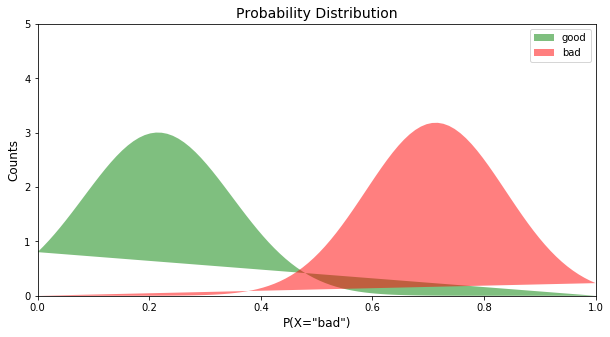

In [293]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
plot_pdf(good_pdf, bad_pdf, ax)

### Now that we have the probability distribution of the binary classes, we can use this distribution to derive the ROC curve.

### Deriving ROC Curve
### To derive the ROC curve from the probability distribution, we need to calculate the True Positive Rate (TPR) and False Positive Rate (FPR). The threshold is at P(X=‘bad’)=0.5 .

### True positive is the area designated as “bad” on the right side of the threshold. False positive denotes the area designated as “good” on the right of the threshold. Total positive is the total area under the “bad” curve while total negative is the total area under the “good” curve. We divide the value as shown in the diagram to derive TPR and FPR. We derive the TPR and FPR at different threshold values to get the ROC curve. Using this knowledge, we create the ROC plot function:

In [294]:
def plot_roc(good_pdf, bad_pdf, ax):
    #Total
    total_bad = np.sum(bad_pdf)
    total_good = np.sum(good_pdf)
    #Cumulative sum
    cum_TP = 0
    cum_FP = 0
    #TPR and FPR list initialization
    TPR_list=[]
    FPR_list=[]
    #Iteratre through all values of x
    for i in range(len(x)):
        #We are only interested in non-zero values of bad
        if bad_pdf[i]>0:
            cum_TP+=bad_pdf[len(x)-1-i]
            cum_FP+=good_pdf[len(x)-1-i]
        FPR=cum_FP/total_good
        TPR=cum_TP/total_bad
        TPR_list.append(TPR)
        FPR_list.append(FPR)
    #Calculating AUC, taking the 100 timesteps into account
    auc=np.sum(TPR_list)/100
    #Plotting final ROC curve
    ax.plot(FPR_list, TPR_list)
    ax.plot(x,x, "--")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_title("ROC Curve", fontsize=14)
    ax.set_ylabel('TPR', fontsize=12)
    ax.set_xlabel('FPR', fontsize=12)
    ax.grid()
    ax.legend(["AUC=%.3f"%auc])

### Now let’s use this plot_roc function to generate the plot:

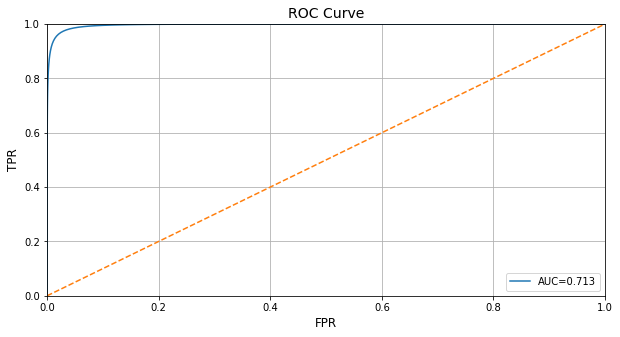

In [295]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
plot_roc(good_pdf, bad_pdf, ax)

### From the figure above, I could say AUC is 0.713.

### Now compare the output of my functions against the output of the pre-built functions available within the scikit-learn library. Specifically, apply the confusion_matrix(), accuracy_score(), precision_score(), recall_score() (remember: recall = sensitivity), f1_score(), and the metrics.classification_report() functions to the relevant columns of the provided data set. Discuss how well the results of these pre-built functions compare to those of the functions I’ve created for this assignment.

In [299]:
from sklearn.metrics import confusion_matrix
confusion_matrix(data['class'],data['scored'])

array([[119,   5],
       [ 30,  27]])

In [300]:
from sklearn.metrics import accuracy_score
accuracy_score(data['class'],data['scored'])

0.8066298342541437

In [301]:
from sklearn.metrics import precision_score
precision_score(data['class'],data['scored'])

0.84375

In [302]:
from sklearn.metrics import recall_score
recall_score(data['class'],data['scored'])

0.47368421052631576

In [303]:
from sklearn.metrics import f1_score
f1_score(data['class'],data['scored'])

0.6067415730337079

In [304]:
from sklearn.metrics import classification_report
metrics.classification_report(data['class'],data['scored'])

'              precision    recall  f1-score   support\n\n           0       0.80      0.96      0.87       124\n           1       0.84      0.47      0.61        57\n\n    accuracy                           0.81       181\n   macro avg       0.82      0.72      0.74       181\nweighted avg       0.81      0.81      0.79       181\n'

### The results from sklearn.metrics are the same as the result from the functions I built.

### Using the metrics.plot_roc_curve () and metrics.auc() functions from the scikit-learn package to generate a ROC plot and calculate AUC for the provided data set. Compare the result with the ROC/AUC function I’ve created for this assignment:

In [305]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [306]:
auc = roc_auc_score(data['class'], data['scored'])
print('AUC: %.2f' % auc)

AUC: 0.72


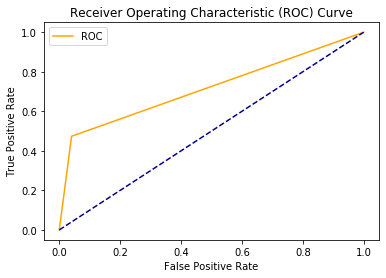

In [308]:
fpr, tpr, thresholds = roc_curve(data['class'], data['scored'])
plot_roc_curve(fpr, tpr)

### The AUC has 0.007's difference, the curve looks different.